In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import math

In [2]:
def seprate(t1,t2,t3,data):
    for i in range (0,data['species'].count()):
        if data['species'].values[i]=='setosa':
            t1.append(i)
        elif data['species'].values[i]=='versicolor':
            t2.append(i)
        elif data['species'].values[i]=='virginica':
            t3.append(i)
    return t1,t2,t3

In [3]:
def ready(train,t1,t2,t3):
    id=int(len(t1)*0.7)
    for i in range (0,id):
        train.append(t1[i])
    id=int(len(t2)*0.7)
    for i in range (0,id):
        train.append(t2[i])
    id=int(len(t3)*0.7)
    for i in range (0,id):
        train.append(t3[i])
    return train

In [4]:
def testing(test,t1,t2,t3):
    for i in range (int(len(t1)*0.7),len(t1)):
        test.append(t1[i])
    for i in range (int(len(t2)*0.7),len(t2)):
        test.append(t2[i])
    for i in range (int(len(t3)*0.7),len(t3)):
        test.append(t3[i])
    return test

In [5]:
def predict(data,test,train,k):
    result={}
    correct=0

    for i in range (0,tr):
        sl=data['sepal_length'][test[i]]
        sw=data['sepal_width'][test[i]]
        pl=data['petal_length'][test[i]]
        pw=data['petal_width'][test[i]]
        for j in range(0,len(train)):
            sl2=data['sepal_length'][train[j]]-sl
            sw2=data['sepal_width'][train[j]]-sw
            pl2=data['petal_length'][train[j]]-pl
            pw2=data['petal_width'][train[j]]-pw
            ans=sl2*sl2+sw2*sw2+pl2*pl2+pw2*pw2
            ans=math.sqrt(ans)
            result[ans]=data['species'][train[j]]
        c1=0
        c2=0
        c3=0
        count=0

        for z in sorted(result):
            if(count==k): break
            if(result[z]=='setosa'): c1=c1+1
            if(result[z]=='versicolor'): c2=c2+1
            if(result[z]=='virginica'): c3=c3+1
            count=count+1
        mx=max(c1,max(c2,c3))
        if(mx==c1):
            if(data['species'][test[i]]=="setosa"):
                print(test[i]," yes ",data['species'][test[i]])
                correct=correct+1
            else:
                print(test[i]," no ",data['species'][test[i]])
        elif(mx==c2):
            if(data['species'][test[i]]=="versicolor"):
                print(test[i]," yes ",data['species'][test[i]])
                correct=correct+1
            else:
                print(test[i]," no ",data['species'][test[i]])
        elif(mx==c3):
            if(data['species'][test[i]]=="virginica"):
                print(test[i]," yes ",data['species'][test[i]])
                correct=correct+1
            else:
                print(test[i]," no ",data['species'][test[i]])
        result.clear()
    return correct

35  yes  setosa
36  yes  setosa
37  yes  setosa
38  yes  setosa
39  yes  setosa
40  yes  setosa
41  yes  setosa
42  yes  setosa
43  yes  setosa
44  yes  setosa
45  yes  setosa
46  yes  setosa
47  yes  setosa
48  yes  setosa
49  yes  setosa
85  yes  versicolor
86  yes  versicolor
87  yes  versicolor
88  yes  versicolor
89  yes  versicolor
90  yes  versicolor
91  yes  versicolor
92  yes  versicolor
93  yes  versicolor
94  yes  versicolor
95  yes  versicolor
96  yes  versicolor
97  yes  versicolor
98  yes  versicolor
99  yes  versicolor
135  yes  virginica
136  yes  virginica
137  yes  virginica
138  yes  virginica
139  yes  virginica
140  yes  virginica
141  yes  virginica
142  yes  virginica
143  yes  virginica
144  yes  virginica
145  yes  virginica
146  yes  virginica
147  yes  virginica
148  yes  virginica
149  yes  virginica
Accuracy of k =  1  is  100.0
35  yes  setosa
36  yes  setosa
37  yes  setosa
38  yes  setosa
39  yes  setosa
40  yes  setosa
41  yes  setosa
42  yes  setosa
43

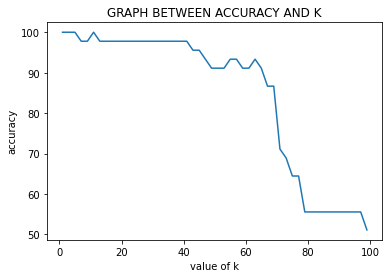

In [6]:
data = pd.read_csv('../input/iriscsv/IRIS.csv')
t1=[]
t2=[]
t3=[]

t1,t2,t3=seprate(t1,t2,t3,data)
test=[]
train=[]
train=ready(train,t1,t2,t3)
test=testing(test,t1,t2,t3)
tr=len(test)

nn=[]
acc=[]
for k in range(1,100,2):
    correct=0
    correct=predict(data,test,train,k)
    per=correct/len(test)*100
    print("Accuracy of k = ",k," is ",per)
    nn.append(k)
    acc.append(per)

plt.plot(nn,acc)
plt.xlabel("value of k")
plt.ylabel("accuracy")
plt.title("GRAPH BETWEEN ACCURACY AND K")
plt.show()